In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from pprint import pprint

In [102]:
data = pd.read_csv(r'C:\Users\danys\Downloads\world-happiness-report-2021.csv', index_col='Country name')

In [103]:
data.drop(columns=['Regional indicator', 'upperwhisker', 'lowerwhisker', 'Explained by: Log GDP per capita',
                 'Explained by: Social support', 'Explained by: Freedom to make life choices',
                 'Explained by: Healthy life expectancy', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'], inplace=True)

# 1. Hierarchical clustering

In [104]:
standartized = preprocessing.scale(data)

In [105]:
standartized_data = pd.DataFrame(standartized, index = data.index, columns = data.columns)
standartized_data.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
Country name,,,,,,,,,,
Finland,2.157462,-1.220020,1.162885,1.216171,1.039750,1.393550,-0.551886,-3.031228,0.0,1.535298
Denmark,1.950046,-1.083204,1.299717,1.216171,1.143618,1.366990,0.300594,-3.070416,0.0,0.816798
Switzerland,1.904265,-1.037599,1.459064,1.111370,1.395869,1.127948,0.267294,-2.437802,0.0,0.762677
Iceland,1.888382,0.011325,1.252086,1.469440,1.188133,1.446671,1.166393,-0.304829,0.0,1.001555
Netherlands,1.804294,-1.448047,1.298851,1.111370,1.099103,1.074828,1.266293,-2.180278,0.0,0.686161


In [106]:
link = linkage(standartized_data, 'ward', 'euclidean')

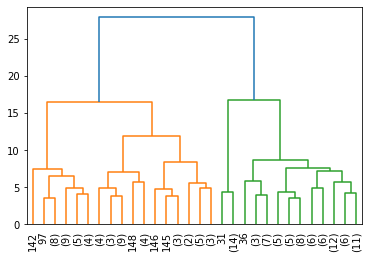

In [107]:
dendogram = dendrogram(link, leaf_rotation = 90., truncate_mode = 'lastp')

Text(0, 0.5, 'Distance')

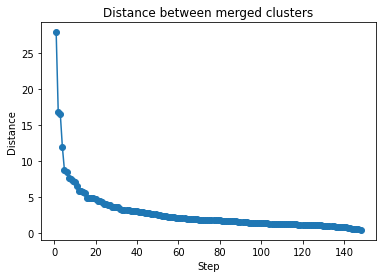

In [108]:
dist = link[:,2]
dist_rev = dist[::-1]
indx = range(1, len(link) + 1)
plt.plot(indx, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

In [114]:
data['cluster'] = fcluster(link, 9, criterion='distance')
data.groupby('cluster').mean()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
cluster,,,,,,,,,,
1,4.624679,0.083607,7.777750,0.662464,55.665214,0.711286,0.074893,0.776893,2.43,2.807536
2,4.534048,0.061714,9.099095,0.760238,61.827238,0.650905,-0.147286,0.815429,2.43,2.084095
3,4.595467,0.055333,9.337733,0.785000,64.591267,0.822933,0.145067,0.714667,2.43,1.454600
4,7.272533,0.037200,10.990333,0.935667,73.256867,0.916333,0.066933,0.322133,2.43,2.629067
5,6.023814,0.053271,9.880286,0.872471,67.988671,0.832486,-0.063414,0.770871,2.43,2.549814


In [116]:
pprint(data[data.cluster == 1].index.tolist()) #poorest countries
pprint(data[data.cluster == 4].index.tolist()) #richest countries

['Congo (Brazzaville)',
 'Ivory Coast',
 'Nepal',
 'Cameroon',
 'Senegal',
 'Ghana',
 'Niger',
 'Gambia',
 'Benin',
 'Guinea',
 'Pakistan',
 'Burkina Faso',
 'Mozambique',
 'Nigeria',
 'Mali',
 'Uganda',
 'Liberia',
 'Kenya',
 'Chad',
 'Comoros',
 'Ethiopia',
 'Madagascar',
 'Togo',
 'Zambia',
 'Sierra Leone',
 'Burundi',
 'Haiti',
 'Malawi']
['Finland',
 'Denmark',
 'Switzerland',
 'Netherlands',
 'Norway',
 'Sweden',
 'Luxembourg',
 'New Zealand',
 'Austria',
 'Australia',
 'Germany',
 'Canada',
 'Ireland',
 'United Kingdom',
 'Singapore']


In [118]:
pprint(data[data.cluster == 5].index.tolist())

['Iceland',
 'Israel',
 'Costa Rica',
 'Czech Republic',
 'United States',
 'Belgium',
 'France',
 'Bahrain',
 'Malta',
 'Taiwan Province of China',
 'United Arab Emirates',
 'Saudi Arabia',
 'Spain',
 'Italy',
 'Slovenia',
 'Guatemala',
 'Uruguay',
 'Kosovo',
 'Slovakia',
 'Brazil',
 'Mexico',
 'Jamaica',
 'Lithuania',
 'Cyprus',
 'Estonia',
 'Panama',
 'Uzbekistan',
 'Chile',
 'Poland',
 'Kazakhstan',
 'Romania',
 'Kuwait',
 'Serbia',
 'El Salvador',
 'Mauritius',
 'Latvia',
 'Colombia',
 'Hungary',
 'Nicaragua',
 'Japan',
 'Argentina',
 'Portugal',
 'Honduras',
 'Croatia',
 'Philippines',
 'South Korea',
 'Peru',
 'Bosnia and Herzegovina',
 'Moldova',
 'Ecuador',
 'Kyrgyzstan',
 'Bolivia',
 'Mongolia',
 'Paraguay',
 'Montenegro',
 'Dominican Republic',
 'Belarus',
 'Russia',
 'Tajikistan',
 'Vietnam',
 'Libya',
 'China',
 'Armenia',
 'Bulgaria',
 'Azerbaijan',
 'North Macedonia',
 'Laos',
 'Bangladesh',
 'Ukraine',
 'Cambodia']


# 2. K-means


In [89]:
df = pd.read_csv(r'C:\Users\danys\Downloads\world-happiness-report-2021.csv', index_col='Country name')
df.drop(columns=['Regional indicator', 'upperwhisker', 'lowerwhisker', 'Explained by: Log GDP per capita',
                 'Explained by: Social support', 'Explained by: Freedom to make life choices',
                 'Explained by: Healthy life expectancy', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
        inplace=True)
standart = preprocessing.scale(df)
data_2 = pd.DataFrame(standart, index=df.index, columns=df.columns)

In [90]:
df.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
Country name,,,,,,,,,,
Finland,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
Denmark,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
Switzerland,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
Iceland,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
Netherlands,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


In [91]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=42)
model.fit(data_2)
model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 3, 5, 5, 5, 5, 2,
       3, 5, 3, 5, 5, 5, 5, 2, 5, 3, 2, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5,
       5, 5, 5, 2, 2, 2, 5, 2, 5, 2, 2, 5, 5, 5, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 5, 2, 5, 5, 5, 5, 2, 2, 2, 2, 1, 4, 5, 4, 5, 2, 5,
       2, 5, 4, 4, 2, 2, 4, 4, 1, 4, 4, 1, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 4, 2, 4, 4, 4, 1, 4, 4, 1, 0, 0, 0, 0, 1, 0, 4, 1, 0, 4, 0,
       1, 0, 4, 4, 1, 4, 1, 4, 0, 1, 4, 4, 4, 0, 1, 0, 0])

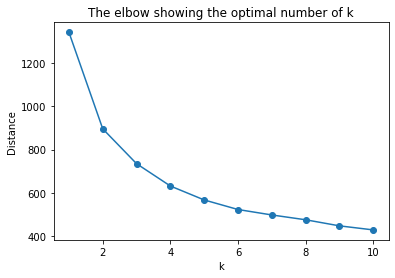

In [92]:
K = range(1,11)
models = [KMeans(n_clusters=k, random_state=42).fit(data_2) for k in K]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker='o')
plt.title('The elbow showing the optimal number of k')
plt.xlabel('k')
plt.ylabel('Distance')
plt.show()

In [95]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_2)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [96]:
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
cluster,,,,,,,,,,
0,4.430881,0.076190,8.012143,0.680405,56.394214,0.714762,0.072643,0.760571,2.43,2.455333
1,6.976296,0.041593,10.798852,0.925259,72.176222,0.896963,0.054407,0.450815,2.43,2.570852
2,5.624200,0.055387,9.716500,0.847975,67.082650,0.796375,-0.084688,0.803425,2.43,2.369775


In [97]:
df.groupby('cluster').size()

cluster
0    42
1    27
2    80
dtype: int64

In [100]:
pprint(df[df.cluster == 1].index.tolist())
pprint(df[df.cluster == 0].index.tolist())
pprint(df[df.cluster == 2].index.tolist())

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Netherlands',
 'Norway',
 'Sweden',
 'Luxembourg',
 'New Zealand',
 'Austria',
 'Australia',
 'Israel',
 'Germany',
 'Canada',
 'Ireland',
 'United Kingdom',
 'United States',
 'Belgium',
 'France',
 'Bahrain',
 'Malta',
 'United Arab Emirates',
 'Uruguay',
 'Singapore',
 'Estonia',
 'Uzbekistan',
 'Hong Kong S.A.R. of China']
['Indonesia',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Nepal',
 'Cameroon',
 'Senegal',
 'Ghana',
 'Niger',
 'Gambia',
 'Benin',
 'Laos',
 'Guinea',
 'Pakistan',
 'Iraq',
 'Burkina Faso',
 'Mozambique',
 'Nigeria',
 'Mali',
 'Iran',
 'Uganda',
 'Liberia',
 'Kenya',
 'Myanmar',
 'Chad',
 'Swaziland',
 'Comoros',
 'Ethiopia',
 'Mauritania',
 'Madagascar',
 'Togo',
 'Zambia',
 'Sierra Leone',
 'India',
 'Burundi',
 'Yemen',
 'Tanzania',
 'Haiti',
 'Malawi',
 'Lesotho',
 'Rwanda',
 'Zimbabwe',
 'Afghanistan']
['Costa Rica',
 'Czech Republic',
 'Taiwan Province of China',
 'Saudi Arabia',
 'Spain',
 'Italy',
 'Slo